# Etape 1: Importation des librairies et chargement de fichier

1-1: Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
import folium

2-1: Chargement de fichier

In [ ]:
# S'assurer  que le fichier CSV est dans le répertoire de travail
file_path = 'final_merged_data_cleaned.csv'

In [ ]:
# Lire le fichier CSV dans une DataFrame
final_merged_data_cleaned = pd.read_csv(file_path)

In [ ]:
# affichage des premières lignes de la DataFrame pour vérifier l'importation
print(final_merged_data_cleaned.head())


   Code zone (M49)            Zone  Population totale  \
0                4     Afghanistan         40099462.0   
1              710  Afrique du Sud         59392255.0   
2                8         Albanie          2854710.0   
3               12         Algérie         44177969.0   
4              276       Allemagne         83408554.0   

   Indice de stabilité politique  Exportations(P) - Quantité  \
0                          -2.53                         0.0   
1                          -0.71                   6451000.0   
2                           0.11                         0.0   
3                          -0.88                         0.0   
4                           0.76                 255995000.0   

   Exportations(P) - Valeur  Importations(P) - Quantité  \
0                       0.0                  12470000.0   
1                 9855000.0                    487000.0   
2                       0.0                    565000.0   
3                       0.0         

# Etape 2: Normalisation des données

2-1: Calcul de l'ACP et des valeurs propres


In [ ]:
# Sélection des colonnes numériques pour l'ACP
features = ['Population totale', 'Indice de stabilité politique', 'Exportations(P) - Quantité',
            'Exportations(P) - Valeur', 'Importations(P) - Quantité', 'Importations(P) - Valeur',
            'Disponibilité alimentaire(v)(Kcal/personne/jour)', 'Exportations(v) - quantité',
            'Importations(v) - quantité', 'Production(v)']

# Standardisation des données
x = final_merged_data_cleaned[features]
x = StandardScaler().fit_transform(x)


In [ ]:
# Calcul de l'ACP
pca = PCA()
principalComponents = pca.fit_transform(x)

In [ ]:
# Sélectionner les variables quantitatives
quantitative_vars = final_merged_data_cleaned.select_dtypes(include= float).dropna()

In [ ]:
# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Variance cumulative expliquée
cumulative_variance = explained_variance.cumsum()

2-2: Visualisation

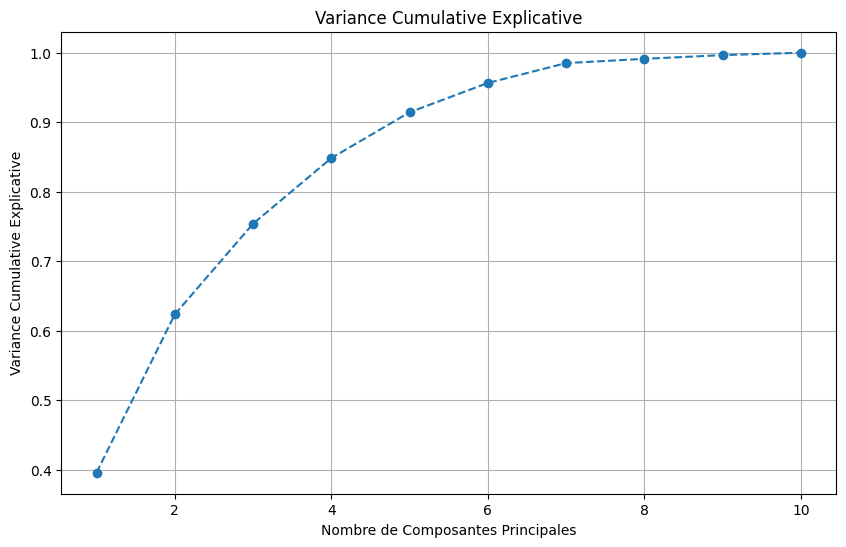

In [ ]:
# Tracer la variance cumulative expliquée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variance Cumulative Explicative')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulative Explicative')
plt.grid()
plt.show()


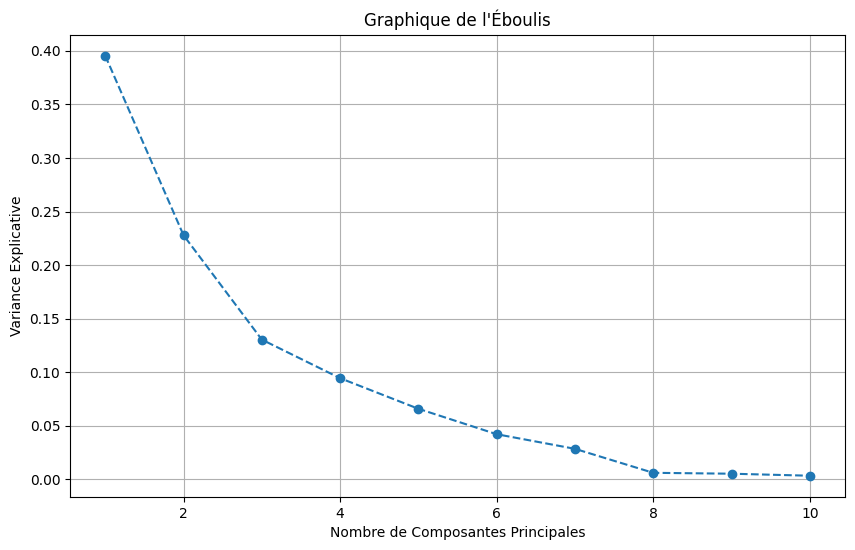

In [ ]:
# Tracer le graphique de l'éboulis (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Graphique de l\'Éboulis')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Explicative')
plt.grid()
plt.show()


In [ ]:
  # Réalisation de l'ACP en conservant les 4 premières composantes principales
pca = PCA(n_components=4)
principal_components = pca.fit_transform(x)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])


In [ ]:
# Ajout des noms des pays pour la visualisation
df_pca['Zone'] = final_merged_data_cleaned['Zone']

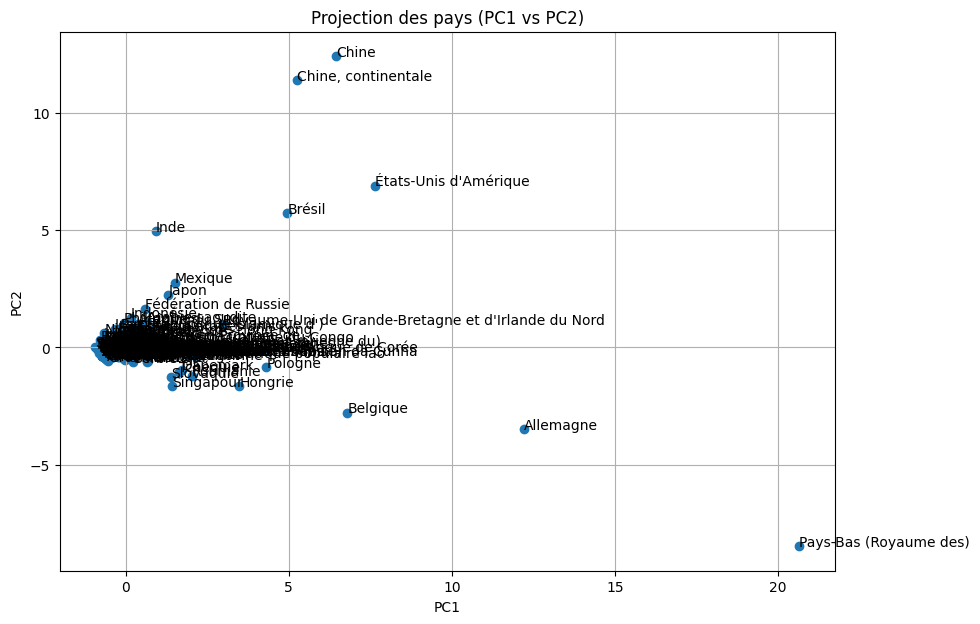

In [ ]:
# Visualisation de contribution des pays pour PC1 et PC2
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'])

for i, country in enumerate(df_pca['Zone']):
    plt.annotate(country, (df_pca['PC1'][i], df_pca['PC2'][i]))

plt.title('Projection des pays (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

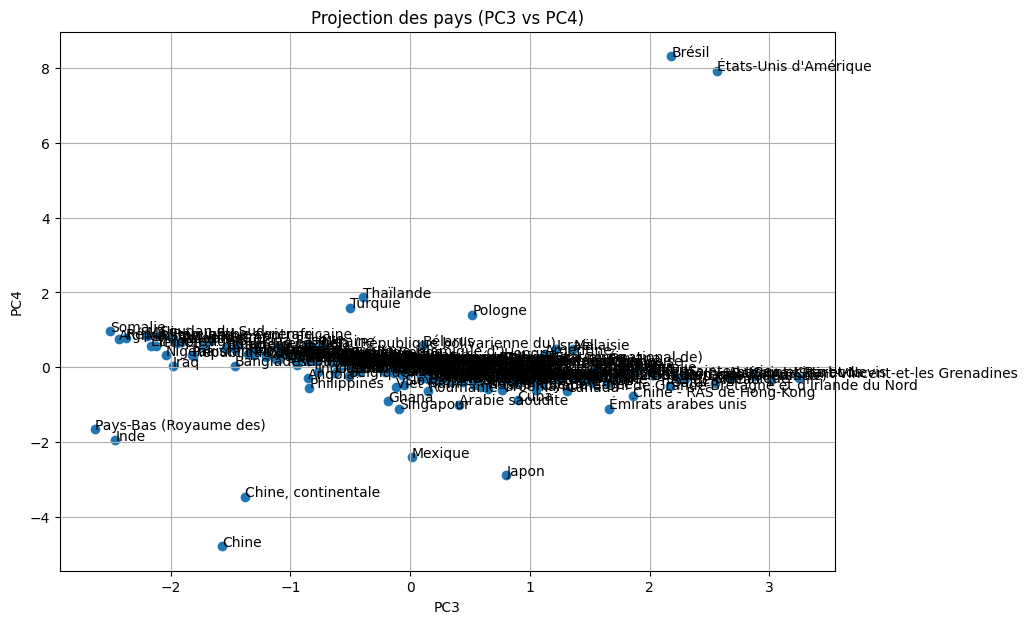

In [ ]:
# Visualisation de contribution des pays pour PC3 et PC4
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC3'], df_pca['PC4'])

for i, country in enumerate(df_pca['Zone']):
    plt.annotate(country, (df_pca['PC3'][i], df_pca['PC4'][i]))

plt.title('Projection des pays (PC3 vs PC4)')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.grid()
plt.show()



In [ ]:
loadings = pca.components_
df_loadings = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=quantitative_vars.columns)
print("Contributions des variables aux composantes principales:")
print(df_loadings)


Contributions des variables aux composantes principales:
                                                       PC1       PC2  \
Population totale                                 0.155572  0.529103   
Indice de stabilité politique                     0.084039 -0.109423   
Exportations(P) - Quantité                        0.447496 -0.242513   
Exportations(P) - Valeur                          0.431453 -0.125776   
Importations(P) - Quantité                        0.419523 -0.277825   
Importations(P) - Valeur                          0.430224 -0.229349   
Disponibilité alimentaire(v)(Kcal/personne/jour)  0.074064  0.104106   
Exportations(v) - quantité                        0.287144  0.237219   
Importations(v) - quantité                        0.281138  0.350987   
Production(v)                                     0.232941  0.559781   

                                                       PC3       PC4  
Population totale                                -0.182159 -0.280994  
Indice d

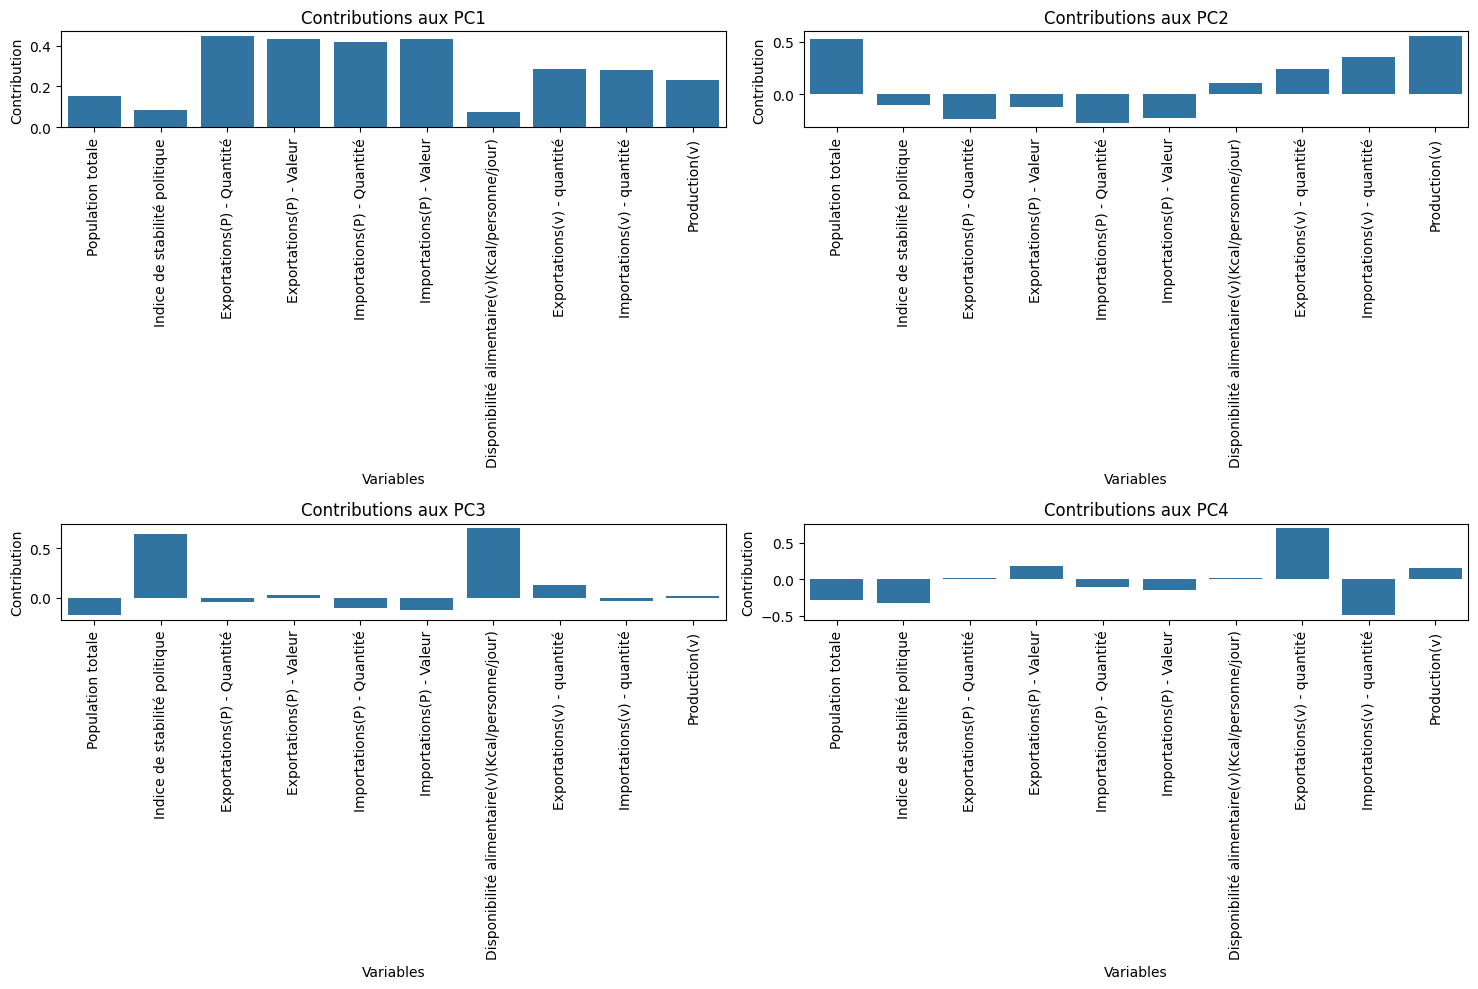

In [ ]:
# Affichage des contributions des variables sous forme de graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.barplot(x=df_loadings.index, y=df_loadings.iloc[:, i], ax=ax)
    ax.set_title(f'Contributions aux {df_loadings.columns[i]}')
    ax.set_ylabel('Contribution')
    ax.set_xlabel('Variables')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

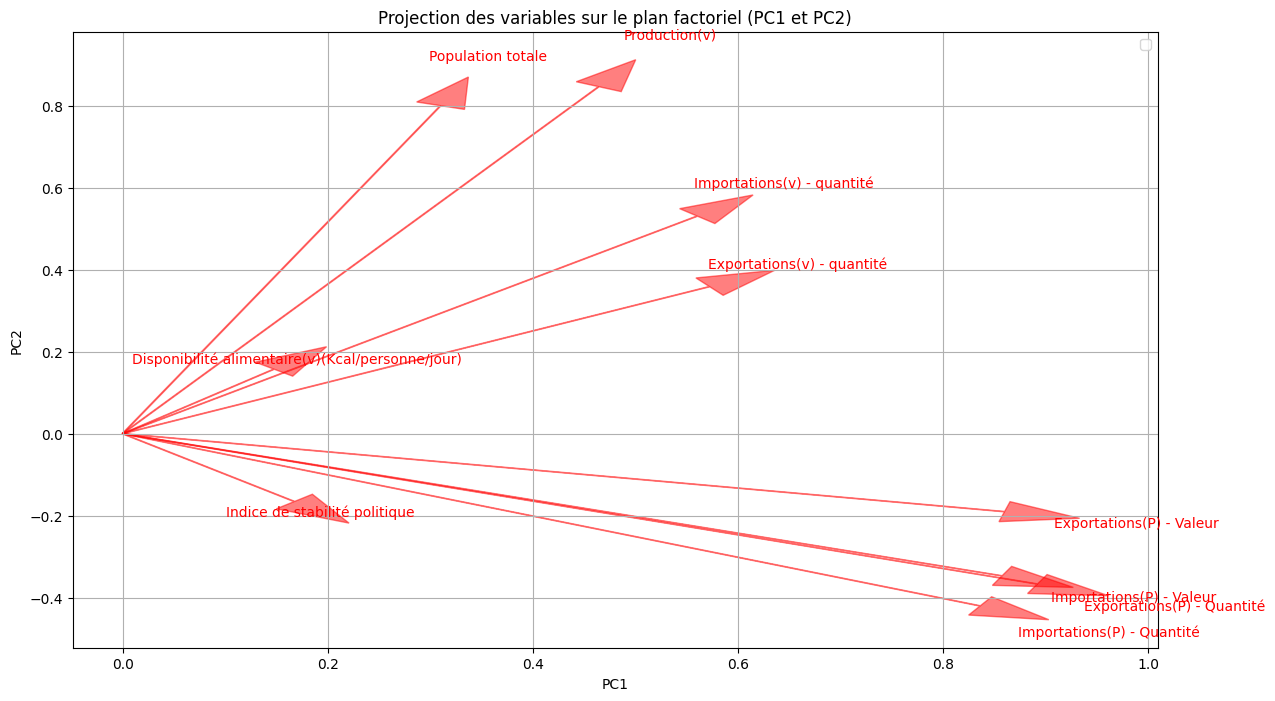

In [ ]:
# Projection des variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Affichage  des variables dans le plan factoriel (PC1 et PC2)
plt.figure(figsize=(14, 8))
# Variables
for i, var in enumerate(quantitative_vars):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var, color='r', ha='center', va='center')

plt.title('Projection des variables sur le plan factoriel (PC1 et PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.legend()
plt.show()

# Etape 3: Clustering Hiérarchique Agglomératif

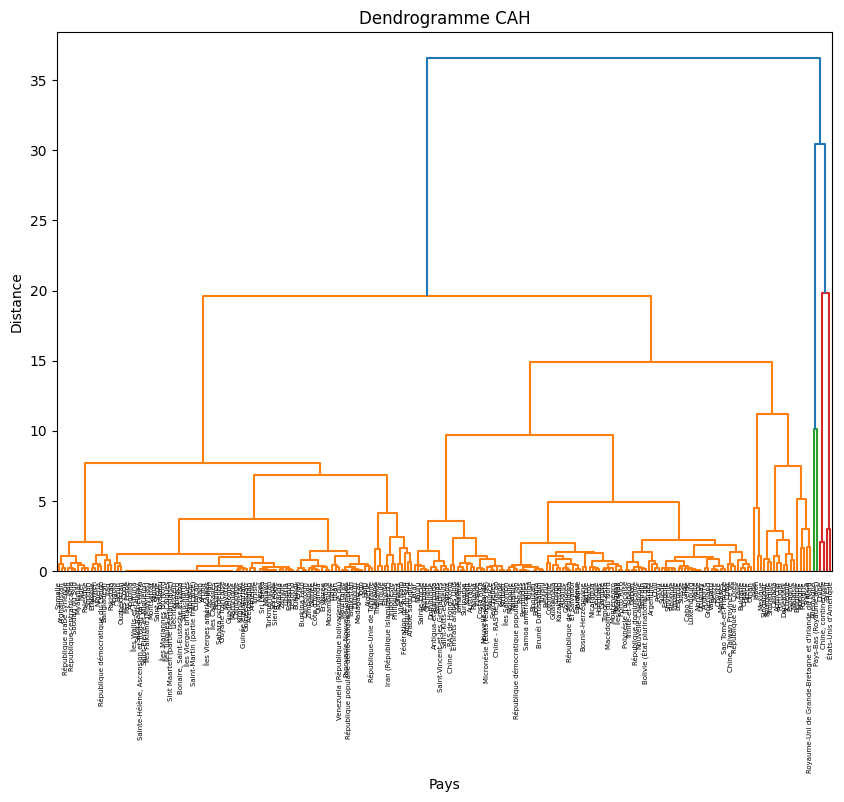

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Réalisation du clustering hiérarchique
Z = linkage(df_pca.iloc[:, :4], method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=final_merged_data_cleaned['Zone'].values)
plt.title('Dendrogramme CAH')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()



In [ ]:
# Détermination des clusters avec 3 clusters
n_clusters = 3
clusters_cah = fcluster(Z, n_clusters, criterion='maxclust')
final_merged_data_cleaned['Cluster_CAH'] = clusters_cah

# Afficher les résultats des clusters
print("Clusters CAH (3 clusters):")
print(final_merged_data_cleaned[['Zone', 'Cluster_CAH']])

Clusters CAH (3 clusters):
                                       Zone  Cluster_CAH
0                               Afghanistan            1
1                            Afrique du Sud            1
2                                   Albanie            1
3                                   Algérie            1
4                                 Allemagne            2
..                                      ...          ...
230  Venezuela (République bolivarienne du)            1
231                                Viet Nam            1
232                                   Yémen            1
233                                  Zambie            1
234                                Zimbabwe            1

[235 rows x 2 columns]


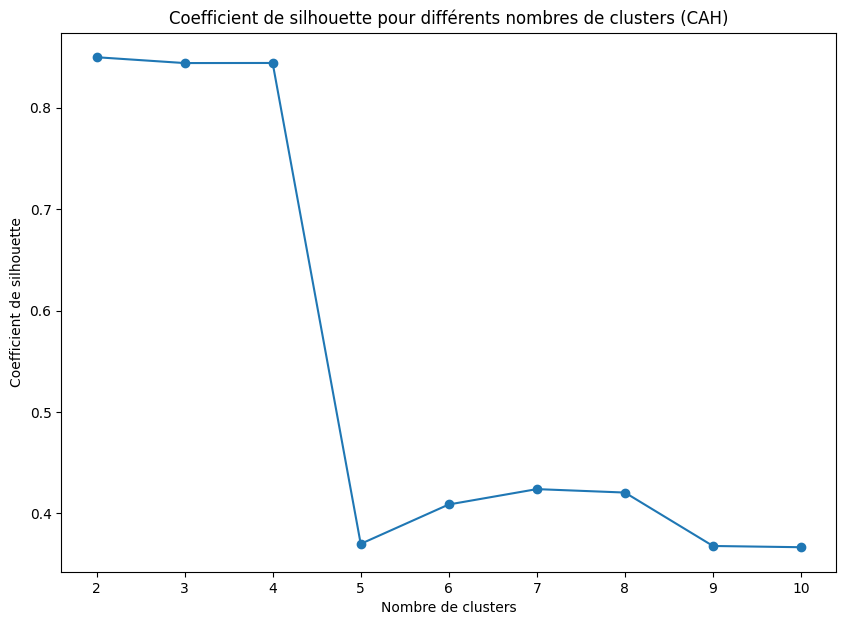

In [ ]:
# Calcul du coefficient de silhouette pour différents nombres de clusters (CAH)
silhouette_scores = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    clusters_cah = fcluster(Z, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_pca.iloc[:, :4], clusters_cah)
    silhouette_scores.append(silhouette_avg)

# Affichage du graphique du coefficient de silhouette
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.title('Coefficient de silhouette pour différents nombres de clusters (CAH)')
plt.show()



# Etape 4: K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

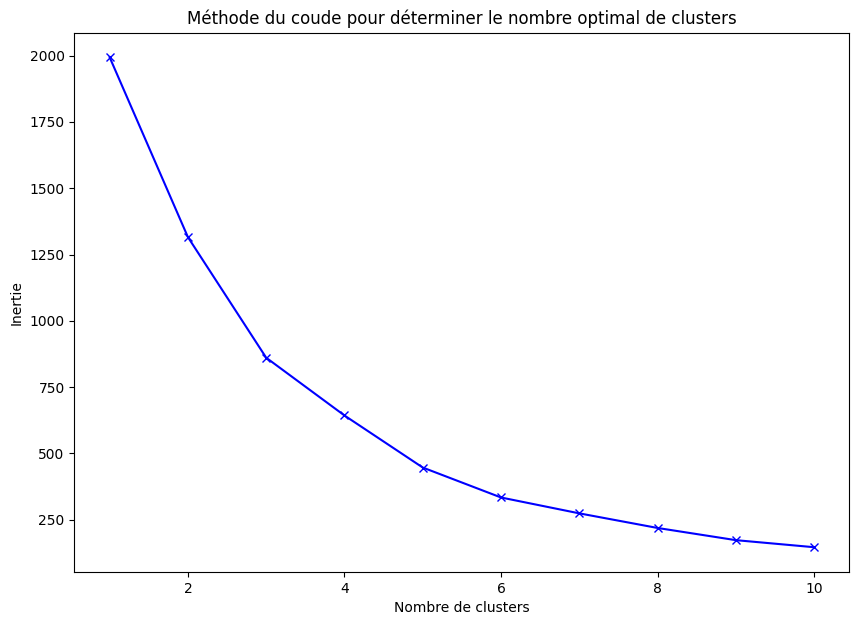

In [ ]:
from sklearn.cluster import KMeans
# Détermination du nombre optimal de clusters avec la méthode du coude
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca.iloc[:, :4])
    inertia.append(kmeans.inertia_)
# Affichage du graphique de la méthode du coude
plt.figure(figsize=(10, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

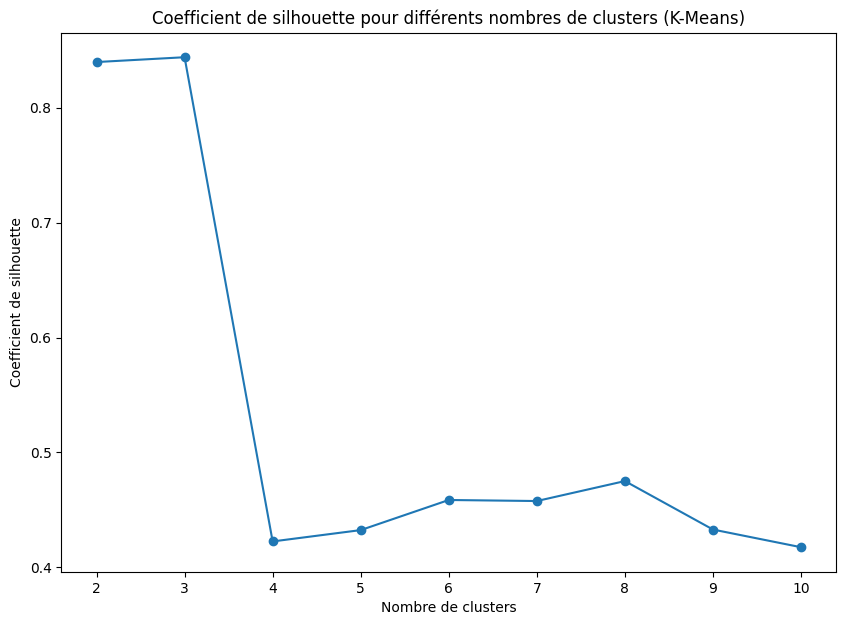

In [ ]:
# Calcul du coefficient de silhouette pour différents nombres de clusters (K-means)
silhouette_scores = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca.iloc[:, :4])
    silhouette_avg = silhouette_score(df_pca.iloc[:, :4], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Affichage du graphique du coefficient de silhouette
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.title('Coefficient de silhouette pour différents nombres de clusters (K-Means)')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters K-Means:
                                       Zone  Cluster_KMeans
0                               Afghanistan               0
1                            Afrique du Sud               0
2                                   Albanie               0
3                                   Algérie               0
4                                 Allemagne               1
..                                      ...             ...
230  Venezuela (République bolivarienne du)               0
231                                Viet Nam               0
232                                   Yémen               0
233                                  Zambie               0
234                                Zimbabwe               0

[235 rows x 2 columns]


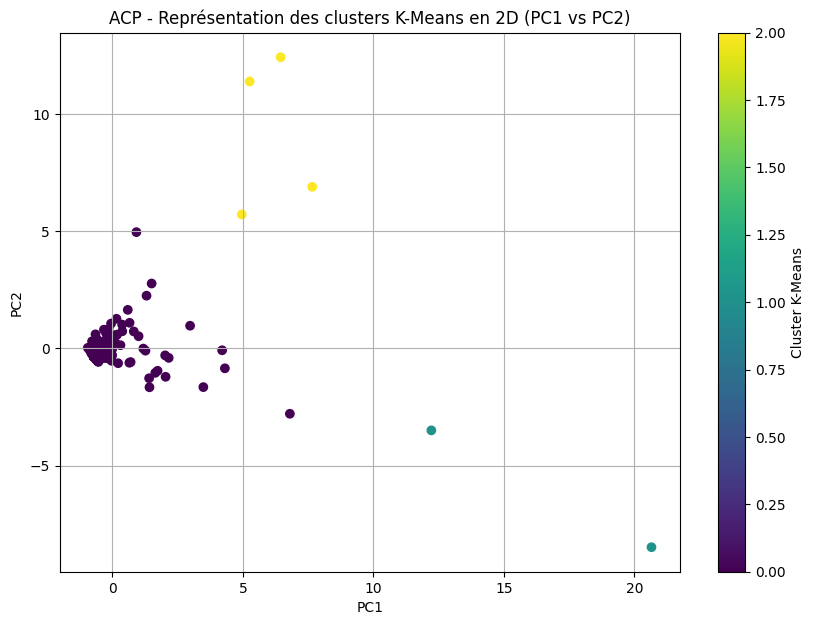

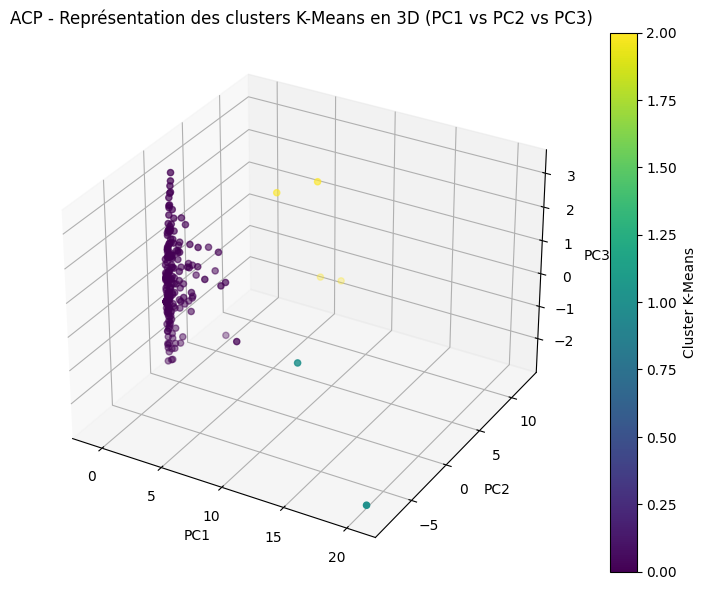

In [ ]:
# Application de K-Means avec le nombre optimal de clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['Cluster_KMeans'] = kmeans.fit_predict(df_pca.iloc[:, :4])

# Affichage des résultats des clusters K-Means
print("Clusters K-Means:")
print(df_pca[['Zone', 'Cluster_KMeans']])

# Représentation en 2D des clusters K-Means
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster_KMeans'], cmap='viridis')
plt.title('ACP - Représentation des clusters K-Means en 2D (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster K-Means')
plt.grid()
plt.show()

# Représentation en 3D des clusters K-Means
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster_KMeans'], cmap='viridis')
ax.set_title('ACP - Représentation des clusters K-Means en 3D (PC1 vs PC2 vs PC3)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(scatter, label='Cluster K-Means')
plt.show()

# Etape 5: Les barycentres des groupes

In [ ]:
# Vérifier si la colonne Cluster_CAH est dans df_pca
if 'Cluster_CAH' not in df_pca.columns:
    # Ajouter la colonne Cluster_CAH depuis df
    df_pca['Cluster_CAH'] =final_merged_data_cleaned['Cluster_CAH']

# Filtrer les colonnes numériques dans df_pca
numeric_columns = df_pca.select_dtypes(include=[np.number]).columns.tolist()

# Calcul des barycentres pour CAH
barycentres_cah = df_pca.groupby('Cluster_CAH')[numeric_columns].mean().iloc[:, :4]
print("Barycentres pour CAH :")
print(barycentres_cah)



Barycentres pour CAH :
                   PC1       PC2       PC3       PC4
Cluster_CAH                                         
1            -0.249782 -0.106851  0.005501 -0.027174
2            16.439922 -5.994780 -1.524954 -0.885545
3             6.080065  9.114589  0.447560  1.998456


In [ ]:
# Calcul des barycentres pour K-Means
barycentres_kmeans = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2', 'PC3', 'PC4'])

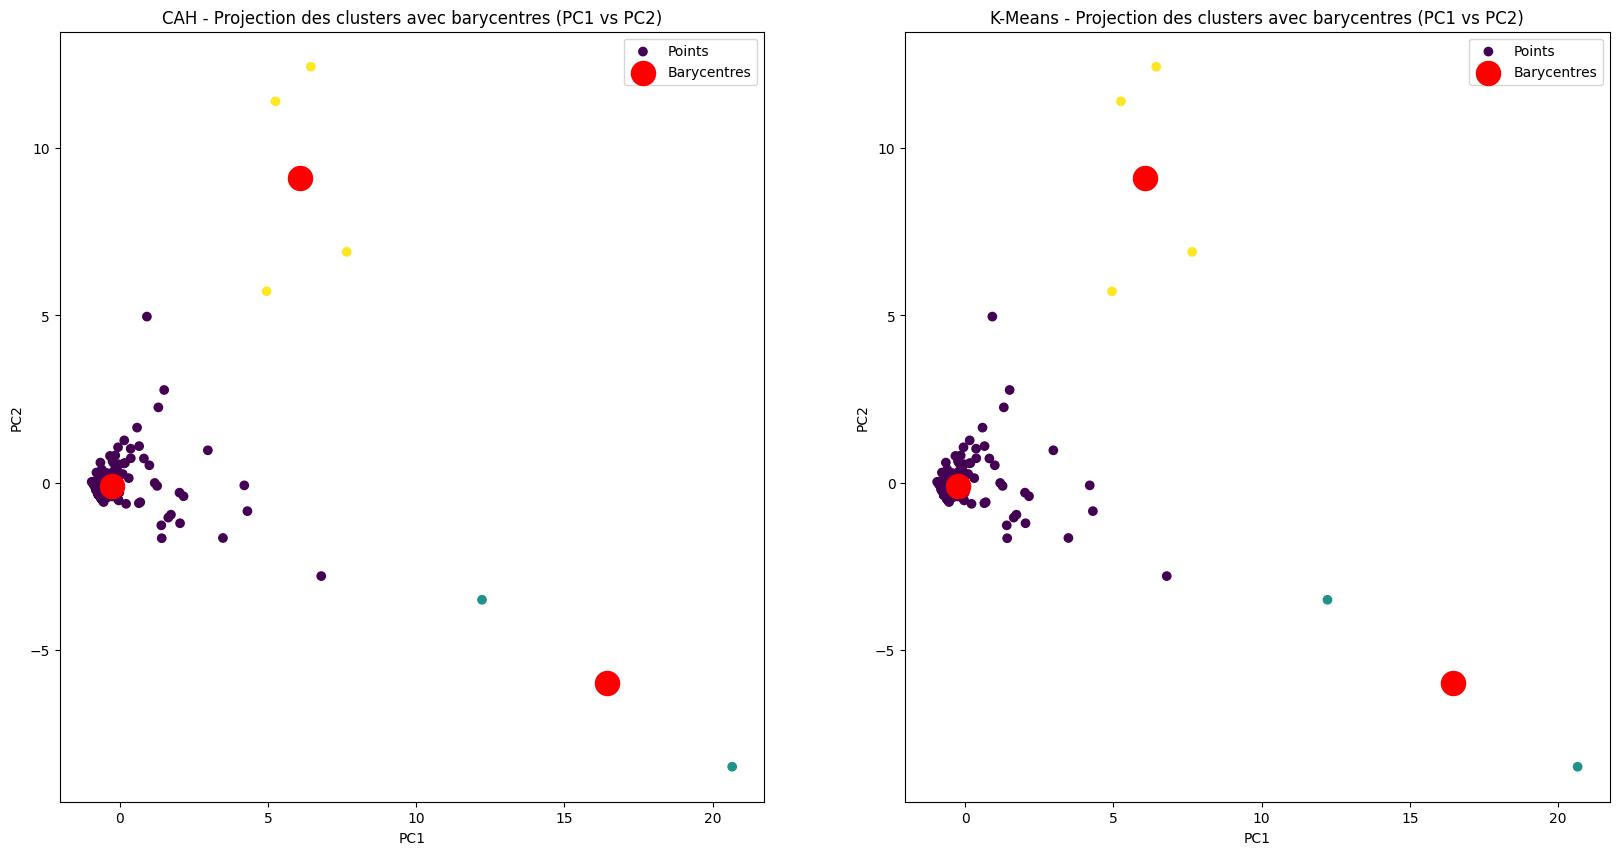

In [ ]:
# Graphique pour CAH
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster_CAH'], cmap='viridis', label='Points')
axs[0].scatter(barycentres_cah['PC1'], barycentres_cah['PC2'], s=300, c='red', label='Barycentres')
axs[0].set_title('CAH - Projection des clusters avec barycentres (PC1 vs PC2)')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].legend()

# Graphique pour K-Means
axs[1].scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster_KMeans'], cmap='viridis', label='Points')
axs[1].scatter(barycentres_kmeans['PC1'], barycentres_kmeans['PC2'], s=300, c='red', label='Barycentres')
axs[1].set_title('K-Means - Projection des clusters avec barycentres (PC1 vs PC2)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].legend()

plt.show()

# Etape 6: Les pays préconisés

In [ ]:
# Liste des caractéristiques Dominantes
dominant_features = ['Population totale', 'Exportations(P) - Quantité',
            'Exportations(P) - Valeur', 'Importations(P) - Quantité', 'Importations(P) - Valeur',
             'Exportations(v) - quantité',
            'Importations(v) - quantité', 'Production(v)']

In [ ]:
# Ajoutez la colonne Cluster_KMeans de df_pca à final_merged_data_cleaned
final_merged_data_cleaned['Cluster_KMeans'] = df_pca['Cluster_KMeans']

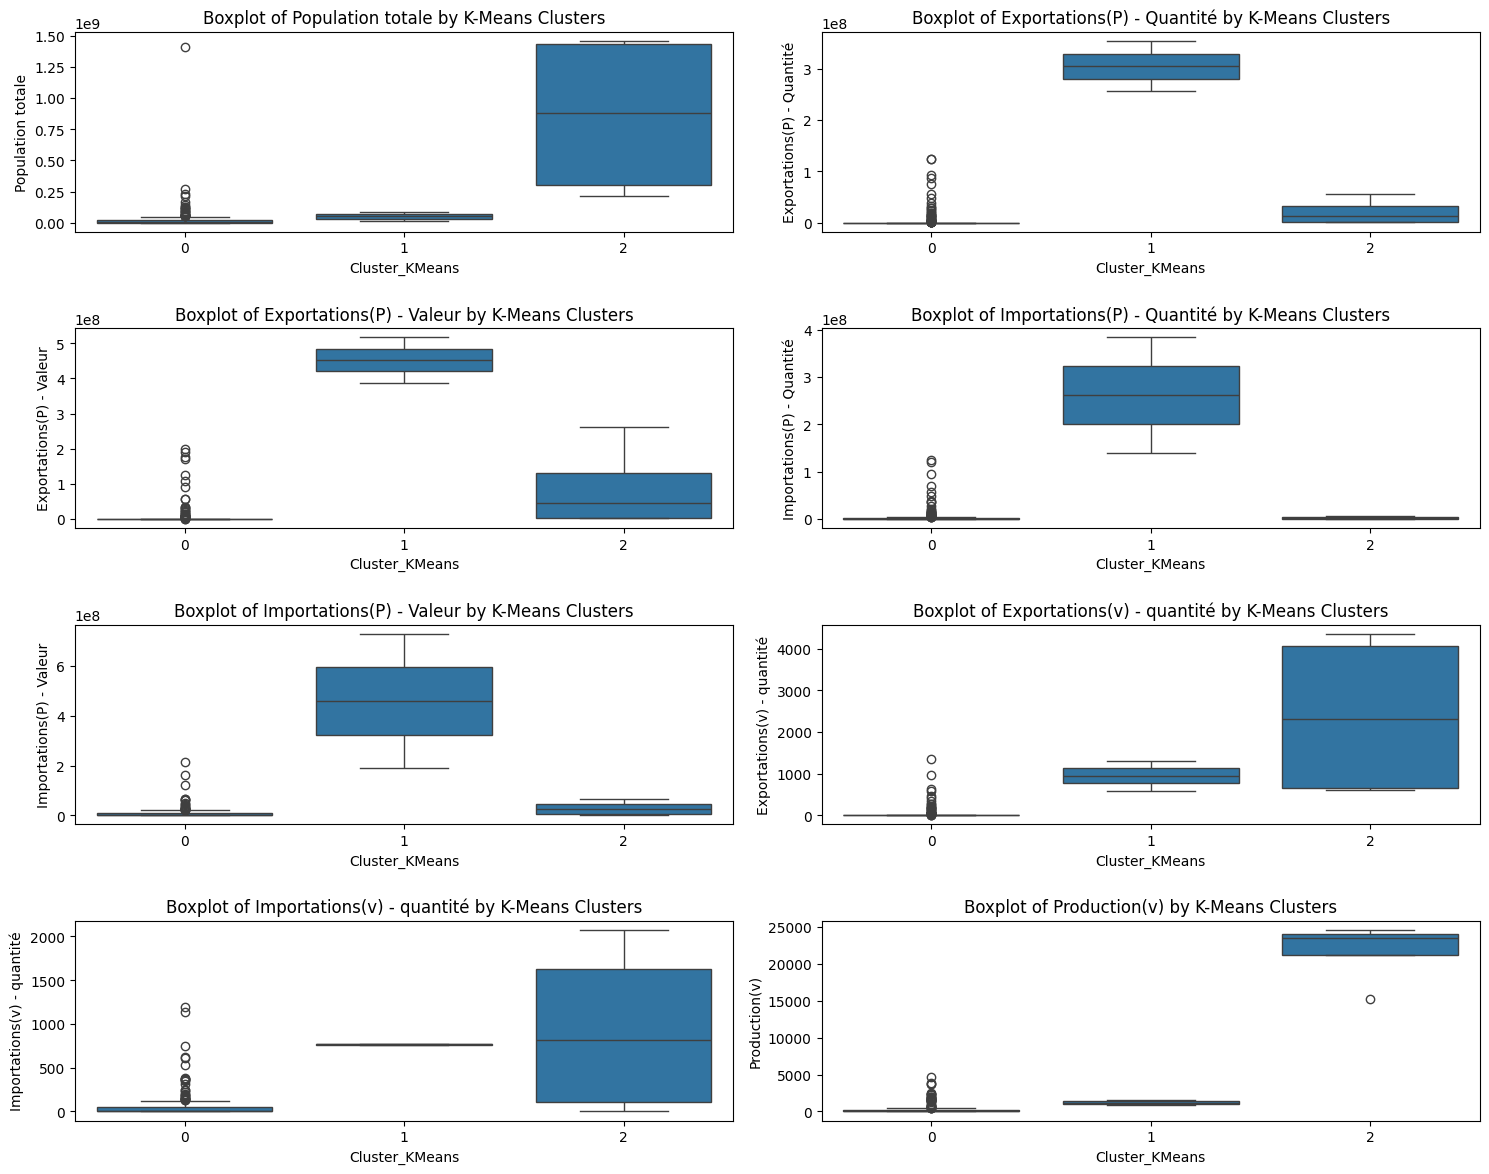

In [ ]:
# Créer des boxplots pour les caractéristiques dominantes par cluster K-Means
plt.figure(figsize=(15, 12))
for i, feature in enumerate(dominant_features):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='Cluster_KMeans', y=feature, data=final_merged_data_cleaned)
    plt.title(f'Boxplot of {feature} by K-Means Clusters')
plt.tight_layout()
plt.show()


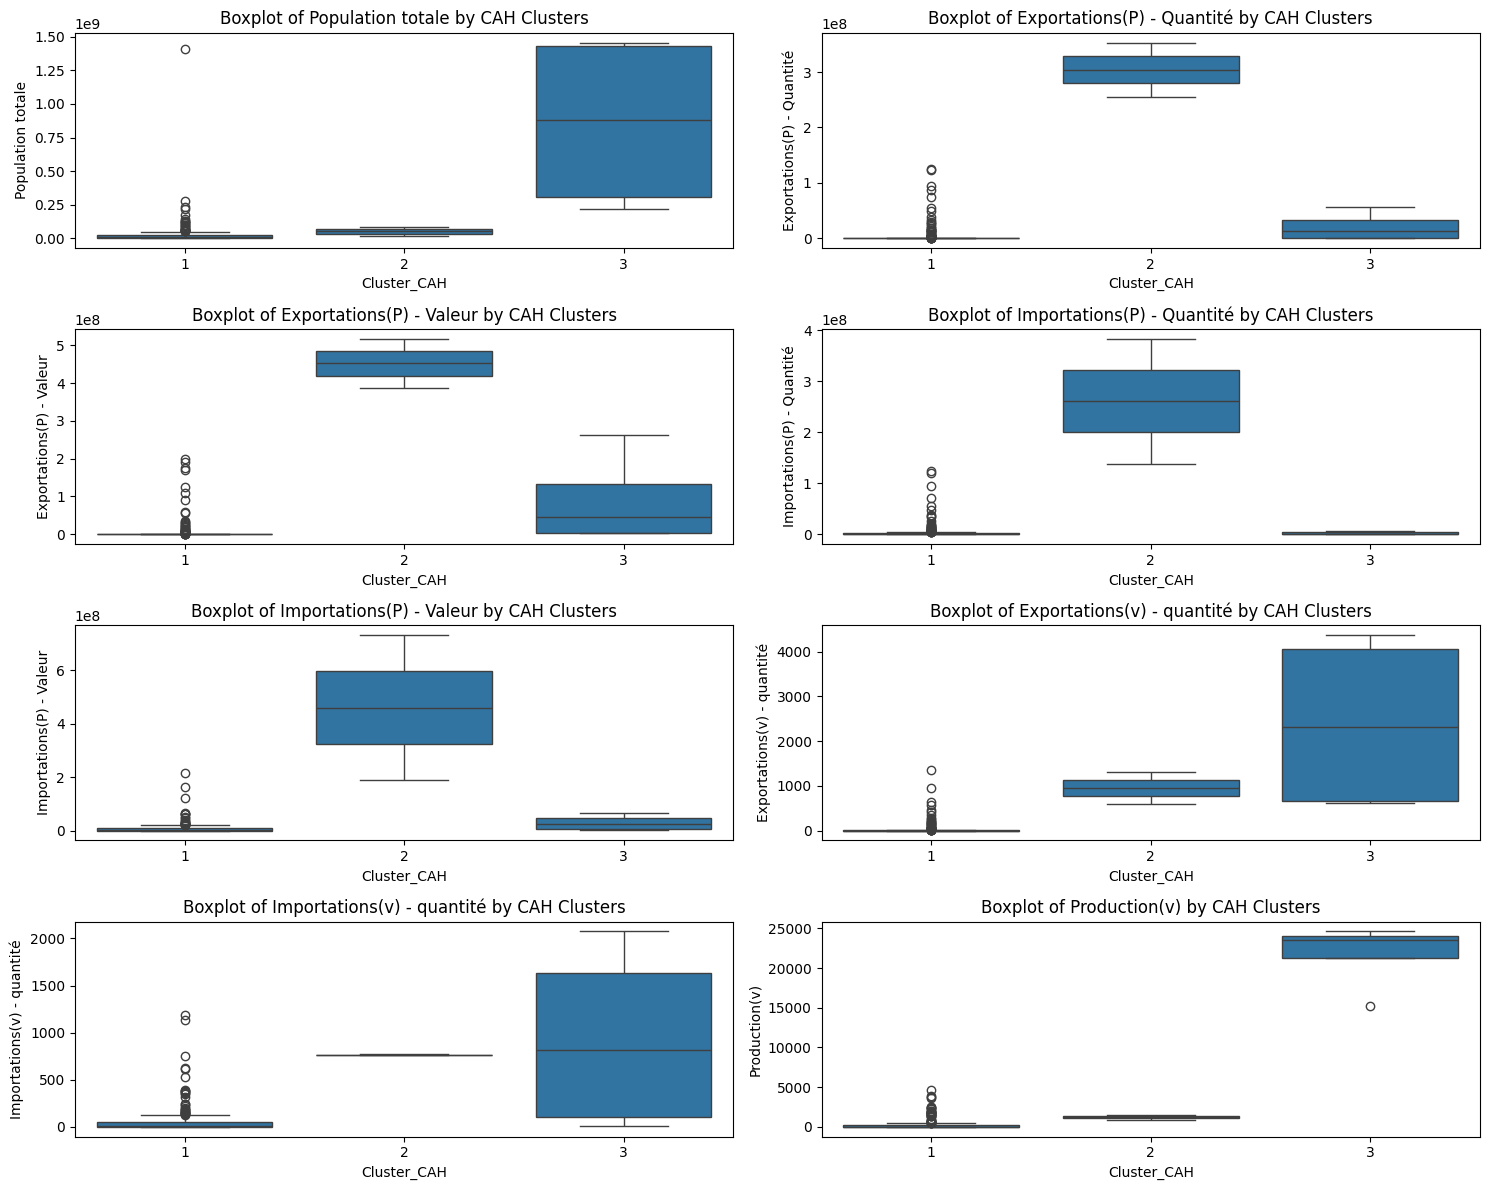

In [ ]:
# Créer des boxplots pour les caractéristiques dominantes par cluster CAH
plt.figure(figsize=(15, 12))
for i, feature in enumerate(dominant_features):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='Cluster_CAH', y=feature, data=final_merged_data_cleaned)
    plt.title(f'Boxplot of {feature} by CAH Clusters')
plt.tight_layout()
plt.show()

In [ ]:
# Filtrer les pays appartenant au Cluster 2 de CAH et Cluster 1 de K-Means
filtered_countries = final_merged_data_cleaned[(final_merged_data_cleaned['Cluster_CAH'] == 2) &
                                               (final_merged_data_cleaned['Cluster_KMeans'] == 1)]
# Sélectionner les pays et leurs caractéristiques dominantes
filtered_countries_caracteristiques = filtered_countries[['Zone'] + dominant_features]

# Afficher les résultats
print("Pays avec caractéristiques dominantes dans le cluster 2 (CAH) et cluster 1 (K-Means):")
print(filtered_countries_caracteristiques.to_string(index=False))

Pays avec caractéristiques dominantes dans le cluster 2 (CAH) et cluster 1 (K-Means):
                  Zone  Population totale  Exportations(P) - Quantité  Importations(P) - Quantité  Exportations(P) - Valeur  Importations(P) - Valeur
             Allemagne         83408554.0                 255995000.0                 138707000.0               516765000.0               189016000.0
Pays-Bas (Royaume des)         17501696.0                 353559000.0                 383520000.0               387233000.0               730446000.0
